==== ERA5_hdsl_02_05S_37_43W_2004_2014_u_v_swh_r.nc ====
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-20 13:18:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1613823764.610227-11800-7-14045a74-22dd-4a05-b12f-4bc2b3bf9547.nc /cache/tmp/14045a74-22dd-4a05-b12f-4bc2b3bf9547-adaptor.mars.internal-1613823764.6107574-11800-4-tmp.grib
    dimensions(sizes): longitude(25), latitude(13), time(16072)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude), int16 swh(time,latitude,longitude), int16 ssrd(time,latitude,longitude)
    groups: 

==== variáveis ====
longitude
latitude
time
u10
v10
swh
ssrd

==== tempos ====
 [ 911640  911646  911652 ... 1008054 1008060 1008066] 16072 hours since 1900-01-01 00:00:00.

<ipython-input-161-2367acc53133>:18: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset)
<ipython-input-161-2367acc53133>:26: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("\n==== tempos ====\n", times, dataset.variables["time"].size, dataset.variables["time"].units)
<ipython-input-161-2367acc53133>:35: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("lats({0}): ".format(dataset.variables["latitude"].units), lats)
<ipython-input-161-2367acc53133>:36: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("lons({0}): ".format(dataset.variables["longitude"].units), lons)



==== média radiação solar ====
0.0


<ipython-input-161-2367acc53133>:81: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar_ssrd.ax.set_ylabel(dataset.variables["ssrd"].units)


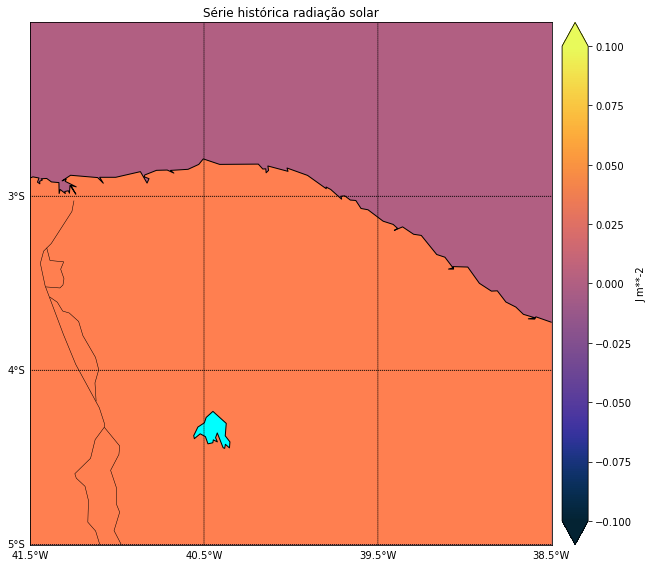


==== média radiação solar ====
0.0


<ipython-input-161-2367acc53133>:81: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar_ssrd.ax.set_ylabel(dataset.variables["ssrd"].units)


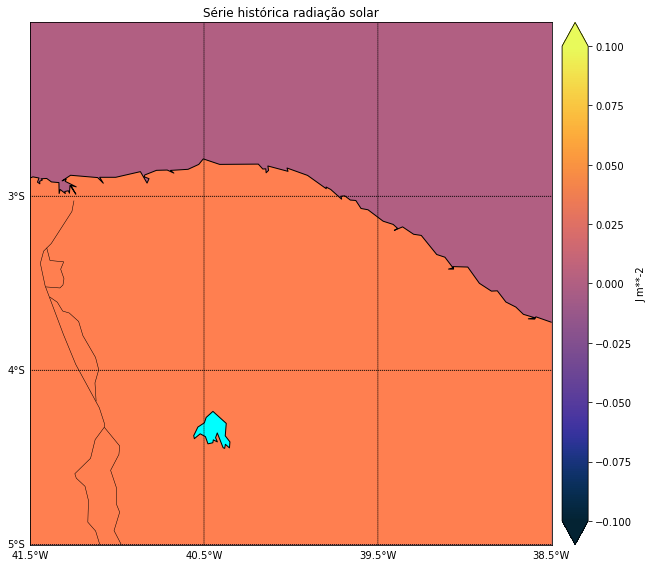


==== média radiação solar ====
1877040.0958194402


<ipython-input-161-2367acc53133>:81: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar_ssrd.ax.set_ylabel(dataset.variables["ssrd"].units)


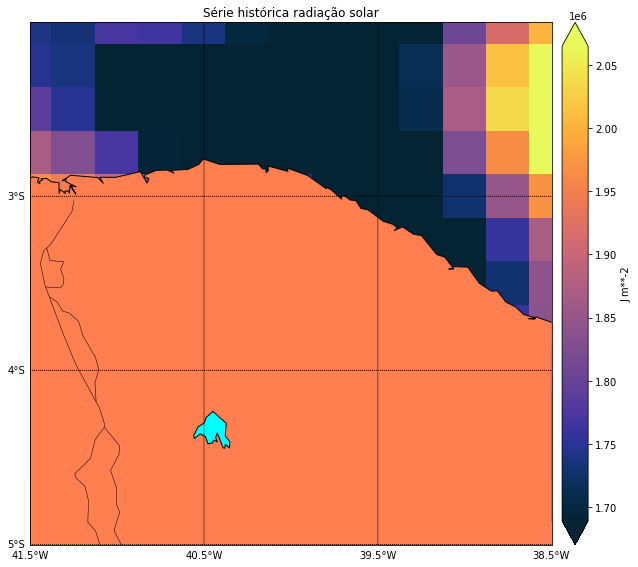


==== média radiação solar ====
2201797.279379291


<ipython-input-161-2367acc53133>:81: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar_ssrd.ax.set_ylabel(dataset.variables["ssrd"].units)


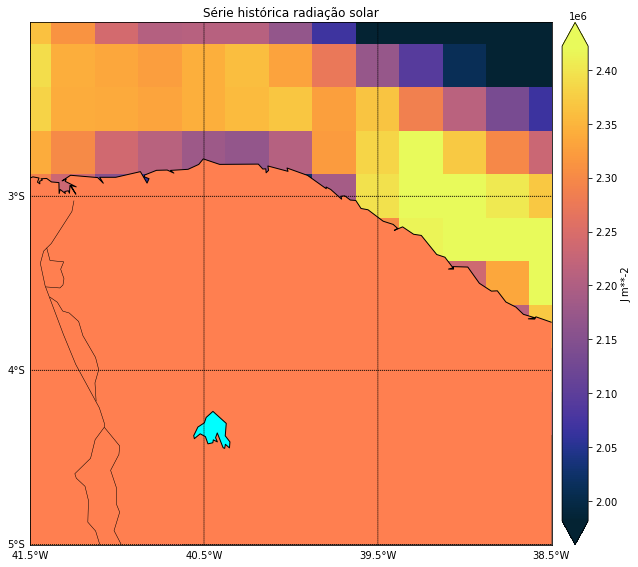

In [161]:
import os
import math
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo

from datetime import datetime
from datetime import timedelta
from mpl_toolkits.basemap import Basemap


url = "ERA5_hdsl_02_05S_37_43W_2004_2014_u_v_swh_r.nc"

print("==== {} ====".format(url))
dataset = nc.Dataset(url, "r", format="NETCDF4" )
print(dataset)

print("\n==== variáveis ====")
for variable in dataset.variables:
    print("========")
    print(variable)

times = dataset.variables["time"][:]
print("\n==== tempos ====\n", times, dataset.variables["time"].size, dataset.variables["time"].units)
initial_date = datetime(1900, 1, 1, 0, 0, 0, 0)
# for time in times:
    # print(initial_date+timedelta(hours=int(time)))


lats = dataset.variables["latitude"][:]
lons = dataset.variables["longitude"][:]
print("\n==== latitudes e longitudes ====")
print("lats({0}): ".format(dataset.variables["latitude"].units), lats)
print("lons({0}): ".format(dataset.variables["longitude"].units), lons)

lon_min = lons[6:19].min()
lon_max = lons[6:19].max()
lat_min = lats.min()
lat_max = lats.max()
print("\n==== setor ====")
print("lon(max -> min): ", lon_max, lon_min)
print("lat(max -> min): ", lat_max, lat_min)

print(np.squeeze(dataset.variables["ssrd"][4, :, :]))

arr = np.squeeze(dataset.variables["ssrd"][:])
print(arr.shape)
print(arr.reshape(int(dataset.variables["time"].size / 4), 4, 13, 25).mean(0))

for i in range(4):
    plt.figure(figsize=(10, 10))
    mp = Basemap(projection="mill", llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i')

    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    mp.fillcontinents(color='coral', lake_color='aqua')
    plt.title("Série histórica radiação solar")

    mp.drawparallels(np.arange(lat_min, lat_max), labels=[1, 0, 0, 0])
    mp.drawmeridians(np.arange(lon_min, lon_max+.25), labels=[0, 0, 0, 1])

    lon, lat = np.meshgrid(lons, lats)
    x, y = mp(lon, lat)

    data_ssrd = arr[i, :, :]
#     print('\n==== ssrd ====\n{}'.format(data_ssrd))

    average_ssrd = np.average(data_ssrd)
    print('\n==== média radiação solar ====\n{}'.format(average_ssrd))

    upper_limit_ssrd = average_ssrd
    lower_limit_ssrd = average_ssrd

    color_ssrd = cmo.cm.thermal
    color_scheme_ssrd = mp.pcolormesh(x, y, data_ssrd, cmap=color_ssrd, shading='auto', vmin=math.floor(lower_limit_ssrd), vmax=math.floor(upper_limit_ssrd))

    color_bar_ssrd = mp.colorbar(color_scheme_ssrd, location='right', extend='both')
    color_bar_ssrd.ax.set_ylabel(dataset.variables["ssrd"].units)

    plt.show()

dataset.close()